Easy
Оценить сбалансированность классов.

Удалить пунктуацию из датасета.

Преобразовать датасет в BOW или TF-IDF, поделить на треин-тест и спрогнозировать вашей любимой моделью

In [7]:
import numpy as np
import pandas as pd

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_excel('sample_data/birulevo sentiment coded.xlsx', index_col=0)
df.columns

Index(['tweet', 'SENTIMENT', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], dtype='object')

In [10]:
df1 = df.drop(['Unnamed: 3','Unnamed: 4', 'Unnamed: 5'], axis=1)
df1

,tweet,SENTIMENT
user,,
NaN,NaN,NaN
BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1
White_technolog,у районной управы собираются местные жители #б...,2
White_technolog,“@tvrain: тем временем конная полиция добралас...,2
White_technolog,в центре появились тощие прыщавые мужичонки с ...,3
...,...,...
GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2
Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2
Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3


In [11]:
df2 = df1.dropna()
df2

,tweet,SENTIMENT
user,,
BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1
White_technolog,у районной управы собираются местные жители #б...,2
White_technolog,“@tvrain: тем временем конная полиция добралас...,2
White_technolog,в центре появились тощие прыщавые мужичонки с ...,3
White_technolog,"как пишет товарищ в смс, на площади революции ...",3
...,...,...
GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2
Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2
Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3


In [12]:
df2.loc[df2['SENTIMENT'] == 'IRR', 'SENTIMENT'] = 2
df2.tweet = df2.tweet.astype('string')
df2['SENTIMENT'].astype(str).astype(int)
#df2['tweet'].astype(str)
#df2.head()
df2.dtypes


tweet        string
SENTIMENT    object
dtype: object

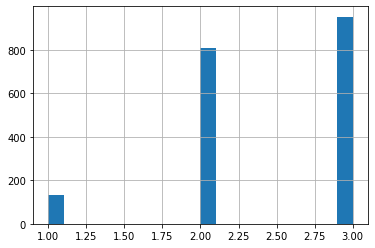

In [13]:
df2.SENTIMENT.hist(bins=20)

In [14]:
import re
p = re.compile(r'[^\w\s]+')
df2['tweet'] = [p.sub('', x) for x in df2['tweet'].tolist()]


In [15]:
from porter import Porter

In [16]:
def preprocess_word(word):
    return Porter.stem(word)

In [17]:
def preprocess_corpus(corpus):
    return [' '.join(map(preprocess_word, text.split())) for text in corpus]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
corpus = df2['tweet']
stemmed_corpus = [' '.join(map(preprocess_word, text.split())) for text in corpus]


In [20]:
bow = CountVectorizer()
bow_result = bow.fit_transform(stemmed_corpus).toarray()
df_r = pd.DataFrame(bow_result, columns=bow.get_feature_names(), index=corpus)
df_r

,000,10,100,1000,1000000,100тысчеловек,11,1100,12,1200,13,1300,13102013,137,13летн,14,146,15,150,1500,15102013,16,17,1731,1735,1737,1746,1748,1749,1750,1756,18,1816,1823,1825,1827,1831,1835,1839,1900,...,эпицентр,эстафет,эт,этн,этнич,этническ,этноконфликт,этнопреступн,этот,эфир,эффективн,эх,юа,юаомоскв,юг,югорск,югр,южн,юл,юнош,юр,юридическ,юрисдикциюнов,яв,явлен,явля,явн,ягуар,яд,язык,языкехаркаютгд,яйц,якеменк,якоб,якунин,январ,яндекспробок,яров,ярост,яс
tweet,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
в вост бирюлево на одну палатку с кошатиной стало меньше live,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
у районной управы собираются местные жители бирюлево live whitepower,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tvrain тем временем конная полиция добралась до бирюлева pictwittercomblrf074rmj бирюлево live бунт,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
в центре появились тощие прыщавые мужичонки с красными повязками дружинник live бунт москва бирюлево,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
как пишет товарищ в смс на площади революции черным черно в смысле орды черножопых live бирюлево москва,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
наш корр dmitryhorse ведет трансляцию из бирюлево,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gazetaru мид ответил на заявление германии о беспорядках в бирюлево httpwwwgazetarusocialnews20131019n_3265197shtmlutm_sourcegoogleamputm_mediumbanneramputm_campaignnews германия,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rt_russian азербайджанские радикалы пригрозили принять меры против русских в баку httprussianrtcomarticle16970 бирюлево,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df_all = pd.merge(df2,df_r, on='tweet')


In [22]:
df_all.index = df_all['tweet'] 
dff = df_all.drop(['tweet'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
y_df = dff[['SENTIMENT']]
x_df = dff.drop(['SENTIMENT'], axis=1)

In [25]:
x = x_df
y = y_df
y=y.astype('int')

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, x_test.shape

((1657, 5076), (415, 5076))

In [27]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score (y_test, y_pred)

0.7397590361445783